![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Random variable distributions

Refer to the `numerical.csv` dataset that you previously saved.

### Instructions

1. Use the numerical variables from our dataset this week.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd

In [2]:
data = pd.read_csv("numerical.csv")
data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,number_of_open_complaints,number_of_policies
0,2763.519279,56274.0,69.0,32.0,5.0,384.811147,0,1
1,6979.535903,0.0,94.0,13.0,42.0,1131.464935,0,8
2,12887.431650,48767.0,108.0,18.0,38.0,566.472247,0,2
3,7645.861827,0.0,106.0,18.0,65.0,529.881344,0,7
4,2813.692575,43836.0,73.0,12.0,44.0,138.130879,0,1
...,...,...,...,...,...,...,...,...
8699,23405.987980,71941.0,73.0,18.0,89.0,198.234764,0,2
8700,3096.511217,21604.0,79.0,14.0,28.0,379.200000,0,7
8701,8163.890428,0.0,85.0,9.0,37.0,790.784983,0,3
8702,7524.442436,21941.0,96.0,34.0,3.0,691.200000,0,2


In [3]:
def check_transformed_distribution(df):
    for column in df.columns:
        # Skip columns with negative or zero values for log and inverse transforms
        if (df[column] <= 0).any():
            continue

        # Transformations
        transformations = {
            'Original': df[column],
            'Log': np.log(df[column]),
            'Square Root': np.sqrt(df[column]),
        }

        for trans_name, trans_data in transformations.items():
            plt.figure(figsize=(10, 6))

            # Plot the distribution of the transformed data
            sns.histplot(trans_data, kde=False, stat="density", linewidth=0)

            # Overlay the theoretical normal distribution
            mu, sigma = stats.norm.fit(trans_data)
            xmin, xmax = plt.xlim()
            x = np.linspace(xmin, xmax, 100)
            p = stats.norm.pdf(x, mu, sigma)
            plt.plot(x, p, 'k', linewidth=2, label="Normal fit")

            plt.title(f'Distribution of {column} - {trans_name} Transformation')
            plt.legend()
            plt.show()

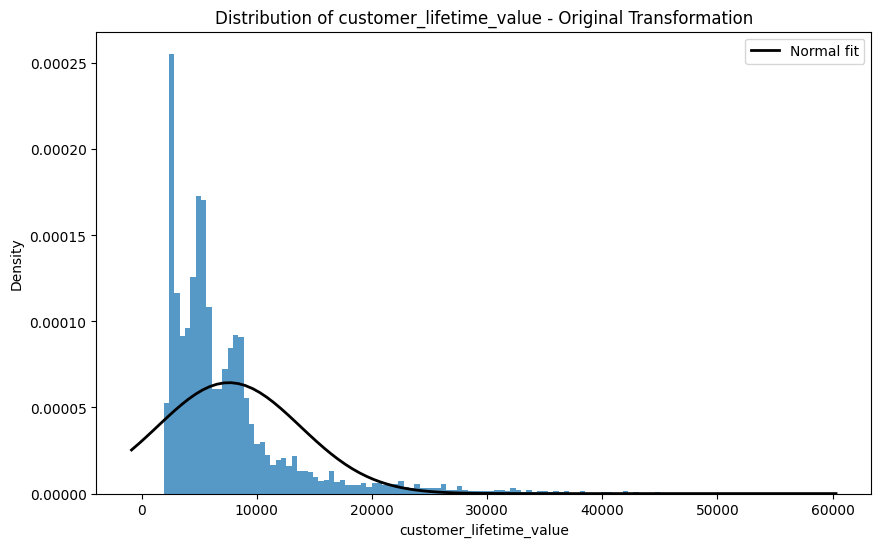

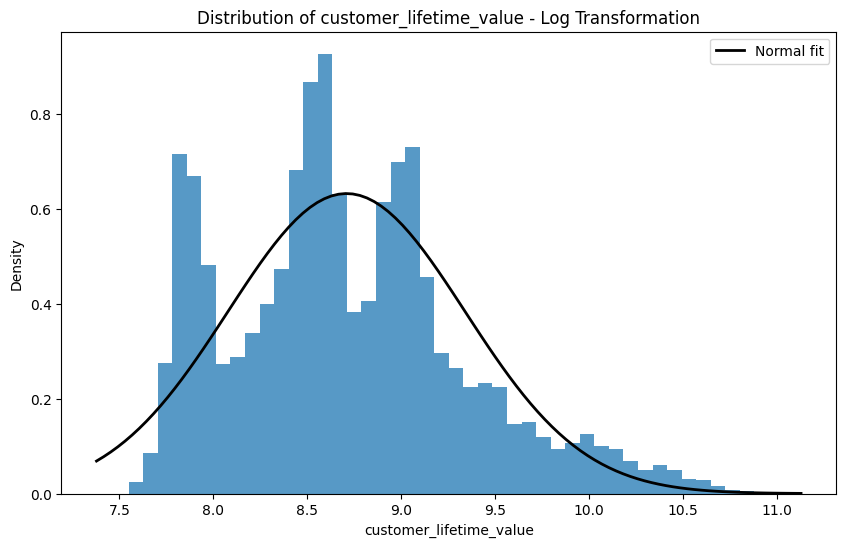

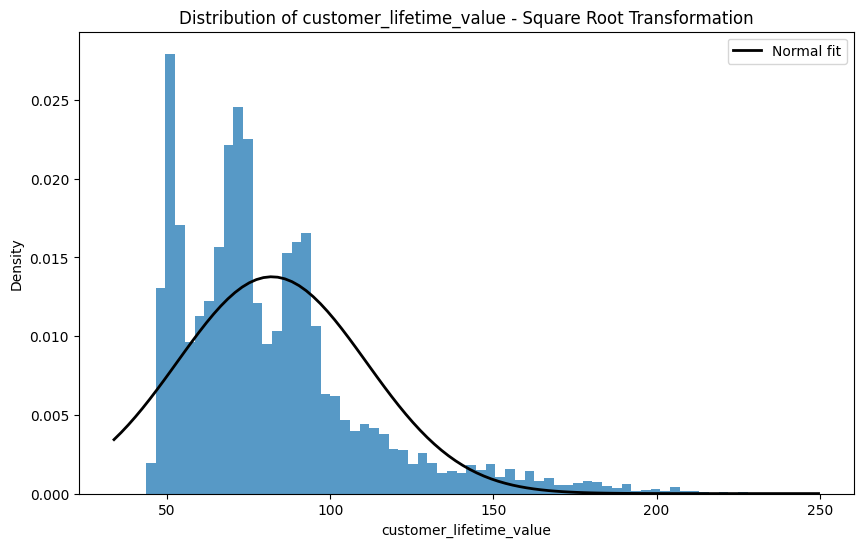

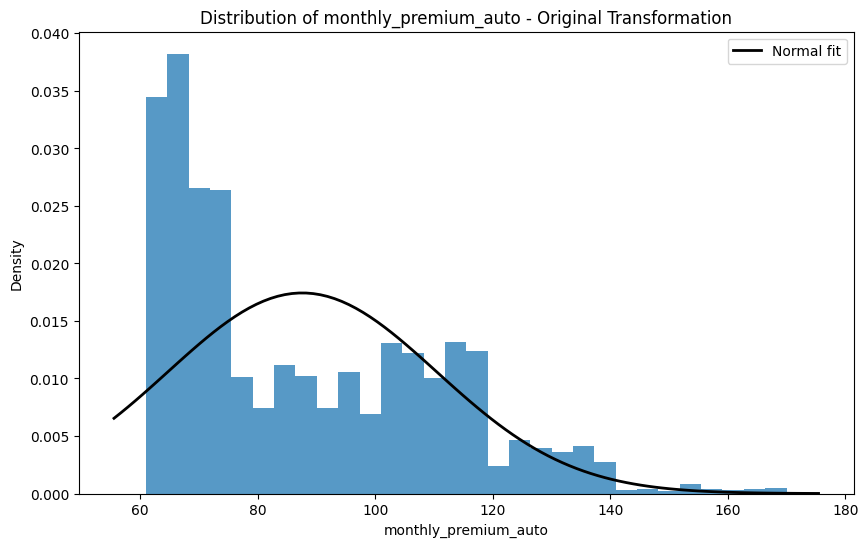

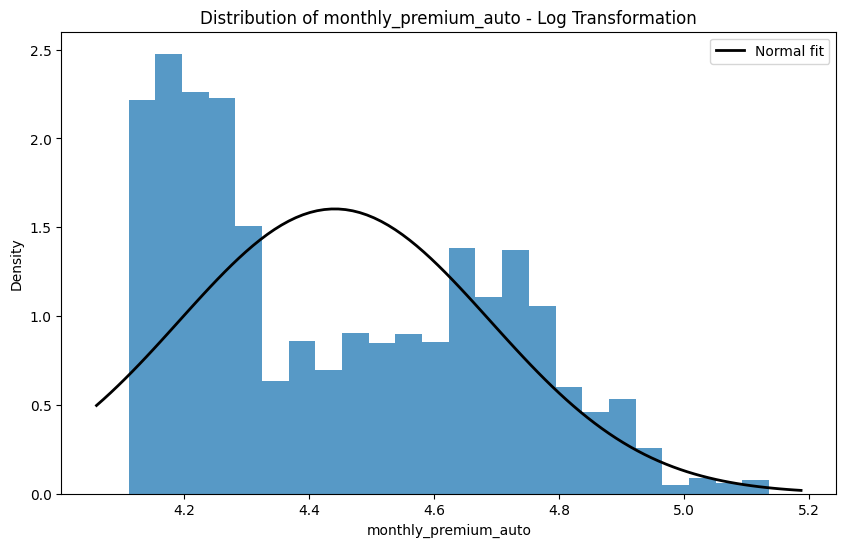

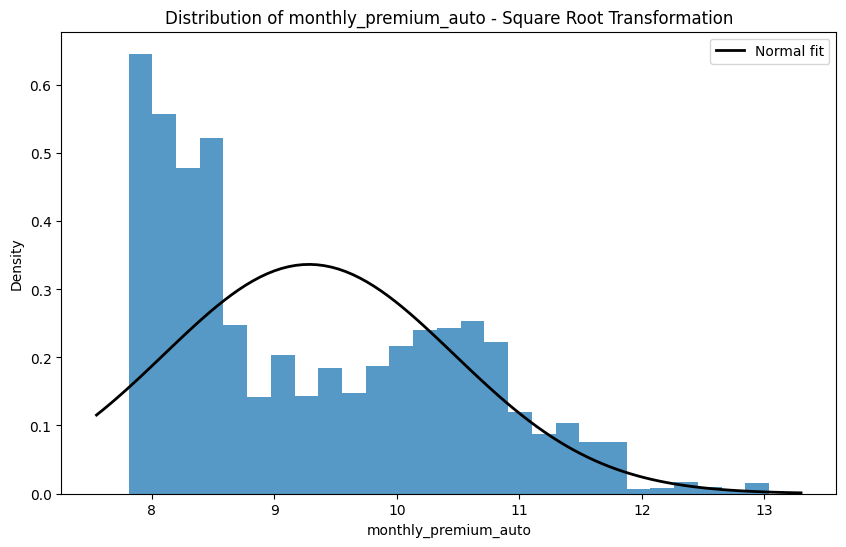

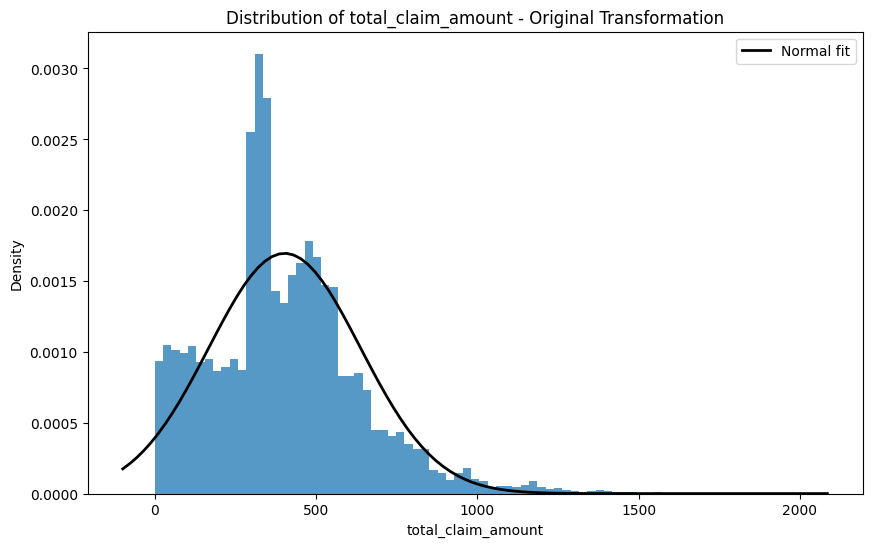

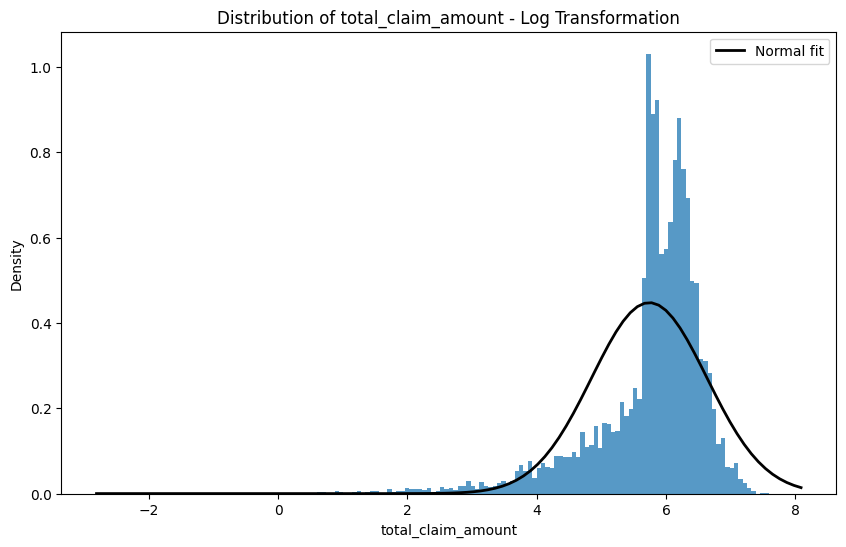

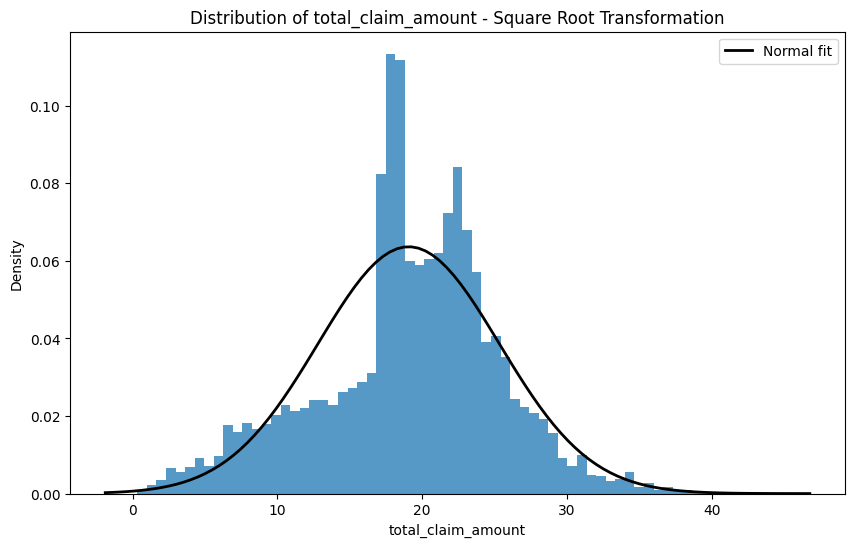

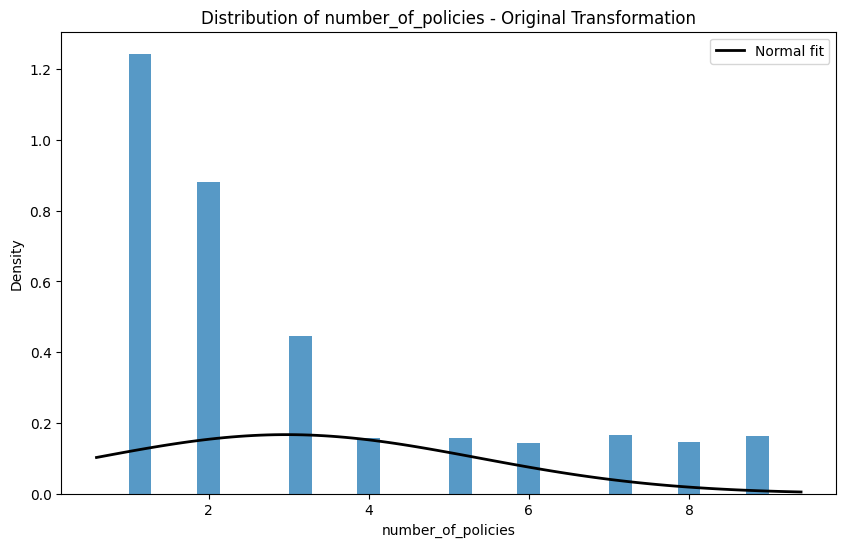

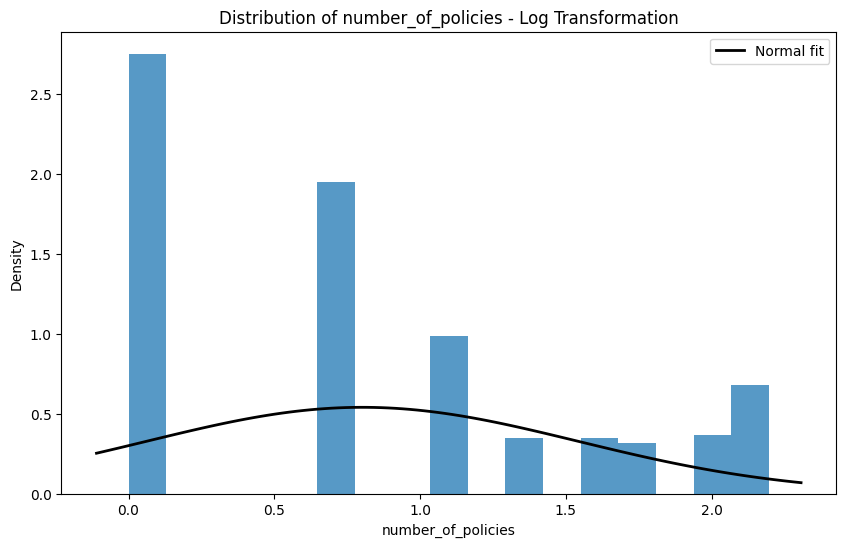

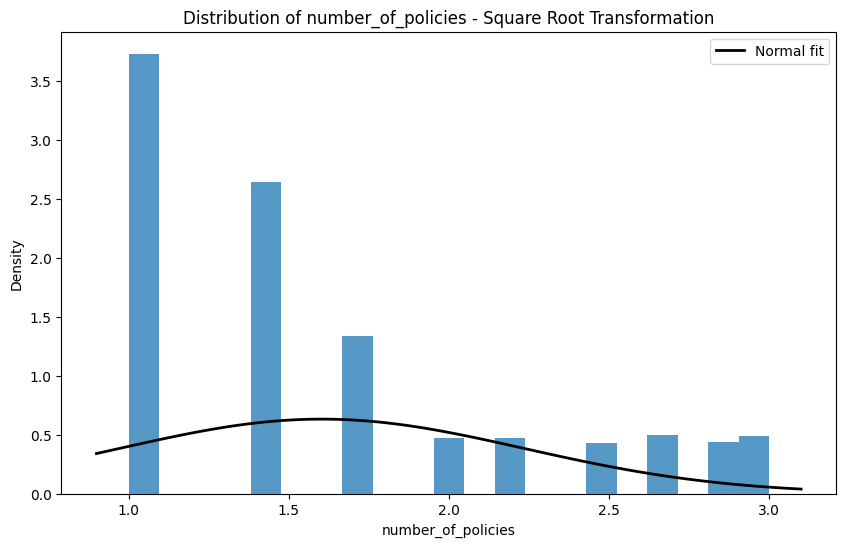

In [4]:
check_transformed_distribution(data)

# Conclusion

The distribution indead changes making it more normal when we transform the data